- smaller radius, more blurred
- https://www.tutorialspoint.com/dip/high_pass_vs_low_pass_filters.htm
- http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html

In [159]:
import os, subprocess, glob

import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage, fftpack, misc
import random

import matplotlib.cm as cm
%matplotlib inline

In [29]:
# not using this class for anything but it's a reference for refining the 3D image.

class Img2D:
    
    def __init__(self, n, r, k):
        self.n = n
        self.r = r
        self.k = k
        self.arr, self.centers = self.gen_2d_points(n, r, k)

    def gen_2d_points(self, n, r, k):
        """
        n = dim of the image.
        r = max radius of point.
        k = num of random points.
        all params >= 1.
        """
        arr = np.ones((n, n))
        centers = []
        while k > 0:
            a = np.random.randint(0, n)
            b = np.random.randint(0, n)
            centers += [(a, b)]
            r1 = np.random.randint(r//2 + 1, r)
            # (a, b) is center of point, r1 is radius for point. 
            a = n//2
            b = n//2
            r1 = r

            y, x = np.ogrid[-a:n-a, -b:n-b]
            mask = x*x + y*y <= r1*r1
            arr[mask] = 255
            mask2 = x*x + y*y == (r1+4)**2 
            arr[mask2] = 255
            k -= 1
        return arr, centers
    
    def get_img(self):
        # not filtered array
        return self.arr
    
    def show_img(self):
        img_filtered = ndimage.fourier.fourier_gaussian(self.arr, sigma=2)
        plt.imshow(img_filtered, cmap='gray', interpolation='nearest');
        
    def get_centers(self):
        return self.centers
    
    def plt_x_section(self):
        img_filtered = ndimage.filters.gaussian_filter(self.arr, sigma=2, order=0)
        x, y = self.centers[0]
        start = -1
        end = -1
        prev = -1
        prev = 100
        for i in range(0, 500):
            curr = img_filtered[x][i]
            if start == -1 and prev == 1.0 and curr != 1.0:
                start = i
            elif start != -1 and end == -1 and prev != 1.0 and curr == 1.0:
                end = i
                break
            prev = curr
        plt.plot(img_filtered[x][start:end])
        plt.show()

In [248]:
# not using this class for anything but it's a reference for refining the 3D image.

class Img2D_edit:
    
    def __init__(self, n, r, k):
        self.n = n
        self.r = r
        self.k = k
        self.arr, self.centers = self.gen_2d_points(n, r, k)

    def gen_2d_points(self, n, r, k):
        """
        n = dim of the image.
        r = max radius of point.
        k = num of random points.
        all params >= 1.
        """
        arr = np.ones((n, n))
        centers = []
        while k > 0:
            a = np.random.randint(0, n)
            b = np.random.randint(0, n)
            centers += [(a, b)]
            r1 = np.random.randint(r//2 + 1, r)
            # (a, b) is center of point, r1 is radius for point. 
            a = n//2
            b = n//2
            r1 = r

            y, x = np.ogrid[-a:n-a, -b:n-b]
            '''
            mask2 = x*x + y*y == (r1+6)**2 
            arr[mask2] = 255
            mask2 = x*x + y*y == (r1+5)**2 
            arr[mask2] = 255
            mask2 = x*x + y*y == (r1+4)**2 
            arr[mask2] = 255
            mask2 = x*x + y*y == (r1+3)**2 
            arr[mask2] = 255
            mask2 = x*x + y*y == (r1+2)**2 
            arr[mask2] = 255
            mask2 = x*x + y*y == (r1+1)**2 
            arr[mask2] = 255
            '''
            for i in range(100):
                for j in range(100):
                    if (i-b)**2 + (j-a)**2 <= (r1+3)**2 and random.random() < 0.7:
                        arr[j, i] = 255
                    if (i-b)**2 + (j-a)**2 <= (r1+7)**2 and (i-b)**2 + (j-a)**2 > (r1+3)**2 and random.random() < 0.10:
                        arr[j, i] = 255
            mask = x*x + y*y <= r1*r1
            arr[mask] = 255
            k -= 1
        return arr, centers
    

In [237]:
img_2d = Img2D(100, 10, 1)


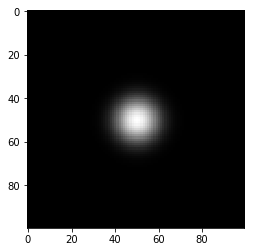

In [225]:
plt.imshow(ndimage.filters.gaussian_filter(img_2d.arr, sigma=5), cmap='gray', interpolation='nearest');


In [249]:
img_edit = Img2D_edit(100, 8, 1)

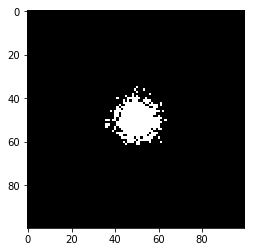

In [250]:
plt.imshow(img_edit.arr, cmap='gray', interpolation='nearest');

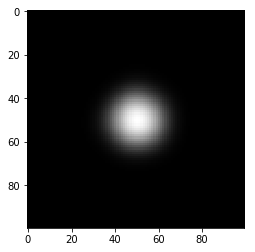

In [251]:
plt.imshow(ndimage.filters.gaussian_filter(img_edit.arr, sigma=5), cmap='gray', interpolation='nearest');

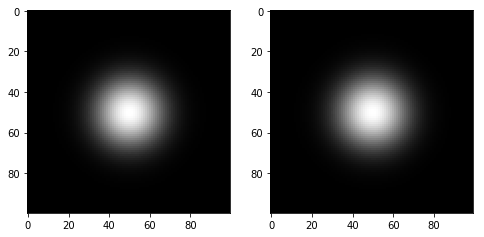

In [252]:
filter1 = ndimage.filters.gaussian_filter(img_2d.arr, sigma=10)
filter2 = ndimage.filters.gaussian_filter(img_edit.arr, sigma=10)

fig=plt.figure(figsize=(8, 8))
plt.subplot(121)
plt.imshow(filter1, cmap='gray', interpolation='nearest');

plt.subplot(122)
plt.imshow(filter2, cmap='gray', interpolation='nearest');


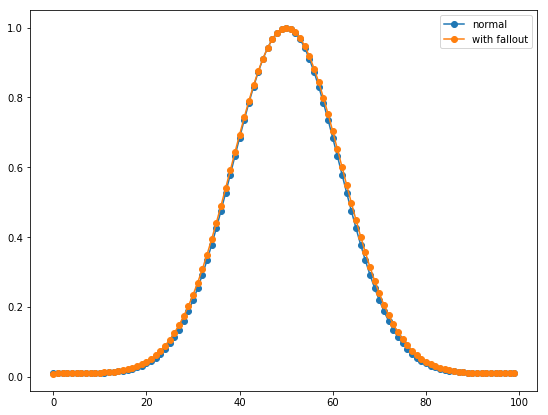

In [253]:
fig=plt.figure(figsize=(20, 7))
plt.subplot(121)
plt.plot(filter1[50,:]/max(filter1[50,:]), label="normal", marker='o')
plt.plot(filter2[50,:]/max(filter2[50,:]), label="with fallout", marker='o')
plt.legend(loc='best')
# now create a subplot which represents the top plot of a grid
# with 2 rows and 1 column. Since this subplot will overlap the
# first, the plot (and its axes) previously created, will be removed
#plt.subplot(122)


In [ ]:
n = 200
a, b = n//2, n//2
arr = np.zeros((n, n))
y, x = np.ogrid[-a:n-a, -b:n-b]
mask = x*x + y*y <= 15**2
arr[mask] = 255
img = arr

#plt.imshow(arr, cmap='gray', interpolation='nearest');

In [ ]:
#img = misc.ascent()

def low_pass_filter(img, w):
    """
    Returns a new image that is low pass filtered.
    """
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    # plt.imshow(magnitude_spectrum, cmap = 'gray')
    rows, cols = img.shape
    crow, ccol = rows//2 , cols//2
    
    
    y, x = np.ogrid[-100:100, -100:100]
    mask = x*x + y*y >= w**2
    fshift[mask] = 0
    """
    fshift[0:crow-w] = False
    fshift[crow+w:] = False
    fshift[:, 0:ccol-w] = False
    fshift[:, ccol+w:] = False
    """
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back
    


In [ ]:
rv = low_pass_filter(img, 10)
plt.imshow(rv, cmap='gray', interpolation='nearest')

In [ ]:
rv = low_pass_filter(ndimage.gaussian_filter(img, sigma=15), 10)
plt.imshow(rv, cmap='gray', interpolation='nearest')

In [ ]:
rv = ndimage.gaussian_filter(low_pass_filter(img, 10), sigma=15)
plt.imshow(rv, cmap='gray', interpolation='nearest')
plt.imshow(rv, cmap='gray', interpolation='nearest')

In [ ]:
rv = low_pass_filter(img, 16)
plt.imshow(rv, cmap='gray', interpolation='nearest')

In [ ]:
rows, cols = img.shape
crow, ccol = rows//2 , cols//2
r = 8
fshift[0:crow-r] = 0
fshift[crow+r:] = 0
fshift[:, 0:ccol-r] = 0
fshift[:, ccol+r:] = 0

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.imshow(img_back, cmap='gray', interpolation='nearest')

In [ ]:
a, b = 250, 250
arr = np.zeros((500, 500))
y, x = np.ogrid[-a:500-a, -b:500-b]
mask = x*x + y*y <= 15*15
arr[mask] = 255
img = arr

img = ndimage.gaussian_filter(img, sigma=20)
plt.imshow(img, cmap='gray', interpolation='nearest')

In [ ]:
# TODO: figure out a good radius for smaller points in 500x500x500 image

In [25]:
class Img3D:
    
    def __init__(self, n, r, k):
        self.n = n
        self.r = r
        self.k = k
        self.img_unfiltered, self.centers = self.gen_3d_points()
        # Might need to change sigma based on n.
        self.img_filtered = ndimage.gaussian_filter(self.img_unfiltered, sigma=7, order=0)
        
    def gen_3d_points(self):
        """
        n = dim of the image.
        r = max radius of point.
        k = num of random points.
        all params >= 1.
        """
        arr = np.zeros((self.n, self.n, self.n))
        centers = []
        for _ in range(self.k):
            a = np.random.randint(self.n//4, 3*self.n//4)
            b = np.random.randint(self.n//4, 3*self.n//4)
            c = np.random.randint(self.n//4, 3*self.n//4)
            # c = self.n//2
            centers += [(a, b, c)]
            r1 = np.random.randint(self.r//2, self.r)
            z, y, x = np.ogrid[-a:self.n-a, -b:self.n-b, -c:self.n-c]
            mask = x*x + y*y + z*z <= r1*r1
            arr[mask] = 255
        return arr, centers

    def show_img(self, filter_flag):
        if filter_flag == 0:
            plt.imshow(self.img_unfiltered[self.centers[0][0]], cmap='gray', interpolation='nearest');
        elif filter_flag == 1:
            plt.imshow(self.img_filtered[:,self.centers[0][0],:,:], cmap='gray', interpolation='nearest');
            
    def x_section(self):
        fig = plt.figure(figsize=(8, 4*len(self.centers)))

        rows = len(self.centers)
        for i in range(rows):
            z, y, x = self.centers[i]
            print(z, y, x)
            axis = np.arange(0, self.n, 1)

            z_vals = self.img_filtered[:, y, x]
            fig.add_subplot(rows, 3, 3*i+1)
            plt.plot(axis, z_vals)

            y_vals = self.img_filtered[z, :, x]
            fig.add_subplot(rows, 3, 3*i+2)
            plt.plot(axis, y_vals)

            x_vals = self.img_filtered[z, y, :]
            fig.add_subplot(rows, 3, 3*i+3)
            plt.plot(axis, x_vals)
            
        plt.show()

In [26]:
fig = plt.figure(figsize=(8, 4))

img = Img3D(100, 20, 3)
"""
z, y, x = img.centers[0]
print(x, y, z)
axis = np.arange(0, img.n, 1)

z_vals = img.img_filtered[:, y, x]
fig.add_subplot(1, 3, 1)
plt.plot(axis, z_vals)

y_vals = img.img_filtered[z, :, x]
fig.add_subplot(1, 3, 2)
plt.plot(axis, y_vals)

x_vals = img.img_filtered[z, y, :]
fig.add_subplot(1, 3, 3)
plt.plot(axis, x_vals)
"""


'\nz, y, x = img.centers[0]\nprint(x, y, z)\naxis = np.arange(0, img.n, 1)\n\nz_vals = img.img_filtered[:, y, x]\nfig.add_subplot(1, 3, 1)\nplt.plot(axis, z_vals)\n\ny_vals = img.img_filtered[z, :, x]\nfig.add_subplot(1, 3, 2)\nplt.plot(axis, y_vals)\n\nx_vals = img.img_filtered[z, y, :]\nfig.add_subplot(1, 3, 3)\nplt.plot(axis, x_vals)\n'

60 25 74
31 36 38
62 66 71


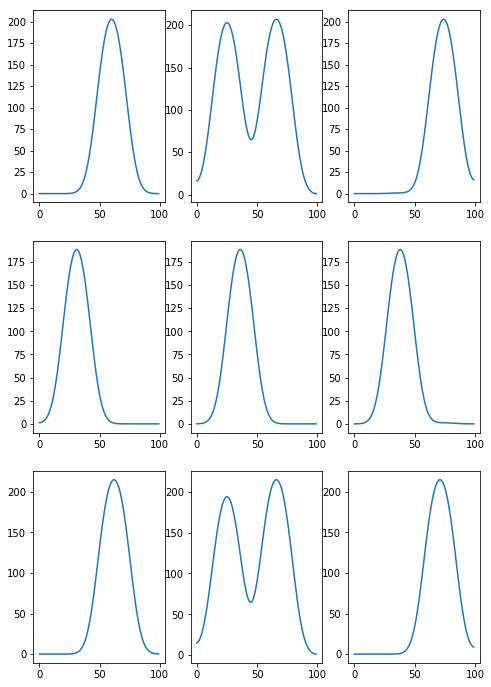

In [27]:
img.x_section()